In [57]:
# Homework Assignment 02: Coding Questions
# Student ID: la815794

"""
Problem 03: Implement a Linear Regression to find the best linear model for the provided data. Plot the result using matplotlib.pyplot.

    1. The linear model follows the format Y=MX + C
    2. Use Mean-Squared-Error (MSE) as the loss function
    3. Use pandas to read the csv file and load the values into two vectors X and Y
    4. Use the Gradient Descent for the training. you may choose fixed learning rate(such as 0.0001) and epochs (1000) without considering mini-batch

"""


'\nProblem 03: Implement a Linear Regression to find the best linear model for the provided data. Plot the result using matplotlib.pyplot.\n\n    1. The linear model follows the format Y=MX + C\n    2. Use Mean-Squared-Error (MSE) as the loss function\n    3. Use pandas to read the csv file and load the values into two vectors X and Y\n    4. Use the Gradient Descent for the training. you may choose fixed learning rate(such as 0.0001) and epochs (1000) without considering mini-batch\n\n'

In [58]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Import dataset and read
dataset = pd.read_csv('HW2_linear_data-1.csv')
print(dataset.shape)
dataset.head()


(100, 2)


,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


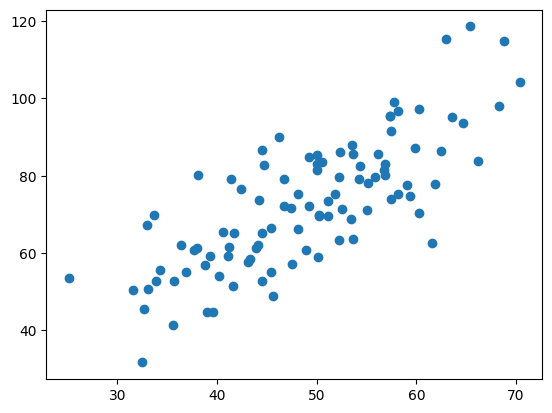

In [59]:
# Visualize Data

plt.scatter(dataset.X,dataset.Y)
plt.show()


In [60]:
# Define Loss Function

"""
Loss Function:

Mean Square Error = (1/n) * Summation(y_predicted - y_target)**2

n = number of samples from the dataset
y_predicted = Value predicted from the model
y_target = Actual value from the dataset
"""

def loss(m,b,points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].X
        y = points.iloc[i].Y
        # Use mean square error as the loss function
        total_error += (y - (m * x + b))**2

    total_error / float(len(points))


In [61]:
# Define Gradient Descent

"""
Gradient_Descent_with_respect_to_Variable = ((partial_derivative_Y_with_respect_to_variable(y_target - y_predicted))**2) * Learning_Rate

partial_derivative_Y_with_respect_to_variable = is the partial derivative of a function Y with respect to a particular variable that we are trying to find through a process of iteration
y_target = the actual value from the dataset that we are trying to match with the y_predicted function by tweaking the prediction function/model
y_predicted = the predicted value from our prediction function/model. We take the partial derivative of one of the values in the function we are trying to tweak
Learning_Rate = Is a value we can set to control how fast the iterative gradient descent process occurs

"""

def gradient_descent(m_now,b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].X
        y = points.iloc[i].Y
        
        # Linear Regression Function = y = m*x + b
        # Gradient Descent Function = initial_value + partial derivative with respect to a value(y_target-y_predicted)**2
        
        
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now)) # Initial_value_of_gradient_for_m + (Partial_derivative_m_with_respect_to_x(y_target-y_predicted)/(number_of_samples)
        b_gradient += -(2/n) * (y - (m_now * x + b_now)) # Initial_value_of_gradient_for_b + (Partial_derivative_b_with_respect_to_x(y_target-y_predicted)/(number_of_samples)


    m = m_now - m_gradient * L # L is the learning rate 
    b = m_now - b_gradient * L

    return m,b



In [62]:
# Execute Training

# Linear regression model:  y = mx + b

# Initialize initial m, b and learning rate

m = 0
b = 0
L = 0.0003
epochs = 1000

for i in range(epochs):
    m,b = gradient_descent(m,b,dataset, L)
    if i % 50 == 0:
        print(f"Epoch: {i}, m: {m}, b: {b}")

print(f"Final Regression Model: y = {m}x + {b}")



Epoch: 0, m: 2.211210892086158, b: 0.043641030332340014
Epoch: 50, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 100, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 150, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 200, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 250, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 300, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 350, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 400, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 450, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 500, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 550, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 600, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 650, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 700, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 750, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 800, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 850, m: 1.4509688947648436, b: 1.45111703651524
Epoch: 900

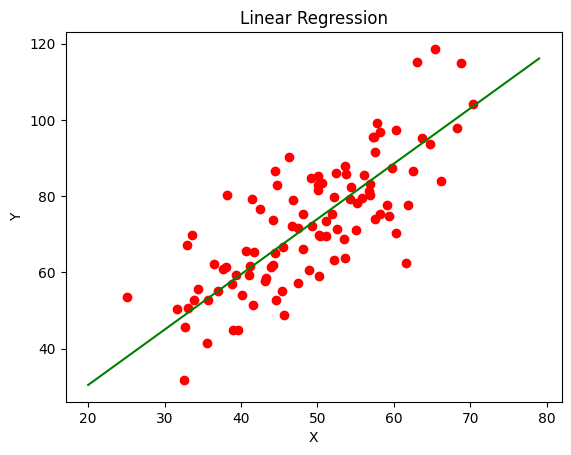

In [63]:
#plot Initial Data and Scatter Plot
plt.scatter(dataset.X, dataset.Y, color = "red")
plt.plot(list(range(20,80)), [m * x + b for x in range(20,80)], color = "green")
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()